In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
import statsmodels.api as sm
from scipy import stats

In [153]:
df = pd.read_csv("Measurements.csv")

In [154]:
display(df.shape)
display(df.dtypes)

(55, 4)

time        float64
distance    float64
material     object
density     float64
dtype: object

In [155]:
df['speed'] = df['distance'] / df['time']

# Create dataframe with averaged data for speed and distance
averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()

# Create dataframe with data by material
averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()

#Create a list with the unique materials.
materials = df['material'].unique()

# Set the Seaborn style to "darkgrid"
sns.set(style="darkgrid")

C:\Users\lukas\AppData\Local\Temp\ipykernel_7532\2063562655.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_df = df.groupby(['material', 'distance'])['time', 'speed', 'density'].mean().reset_index()
C:\Users\lukas\AppData\Local\Temp\ipykernel_7532\2063562655.py:7: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  averaged_material_df = df.groupby(['material'])['speed', 'density'].mean().reset_index()


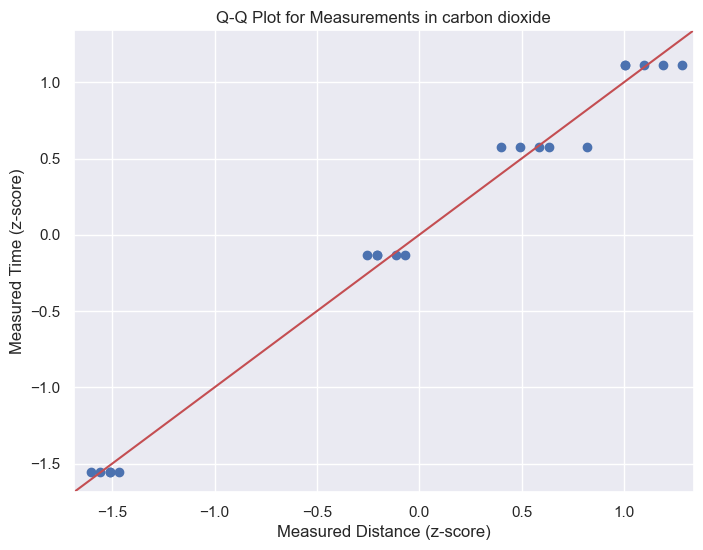

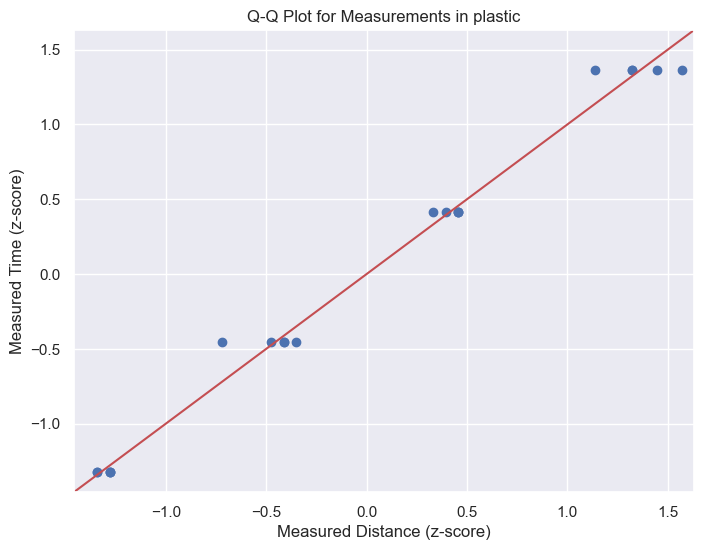

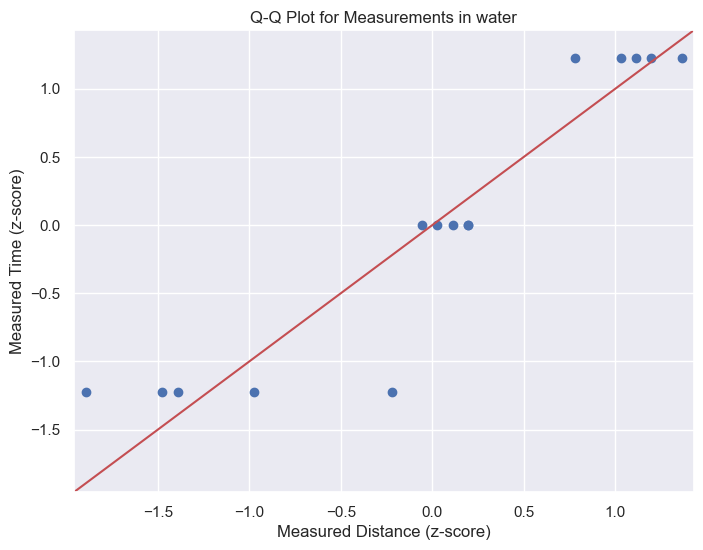

In [156]:
# Create separate Q-Q plots for each material
for material in materials:
    # Filter the data for the current material
    material_data = df[df['material'] == material]

    # Extract time and distance data
    time_data = material_data['time'].values
    distance_data = material_data['distance'].values

    # Create a Q-Q plot
    fig, ax = plt.subplots(figsize=(8, 6))
    sm.qqplot_2samples(stats.zscore(time_data), stats.zscore(distance_data), ax=ax, line='45')
    ax.set_xlabel('Measured Distance (z-score)')
    ax.set_ylabel('Measured Time (z-score)')
    ax.set_title(f'Q-Q Plot for Measurements in {material}')
    plt.grid(True)
    plt.show()

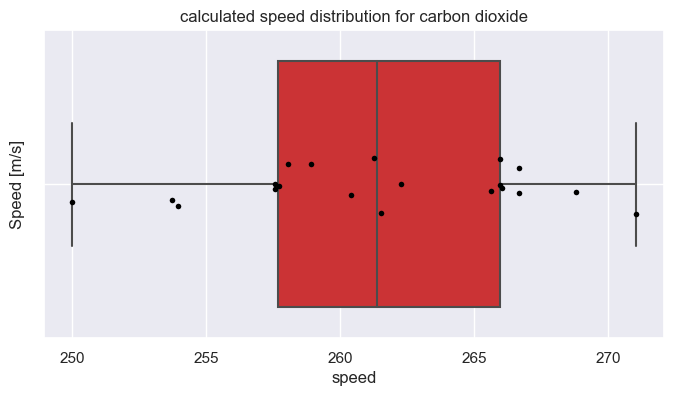

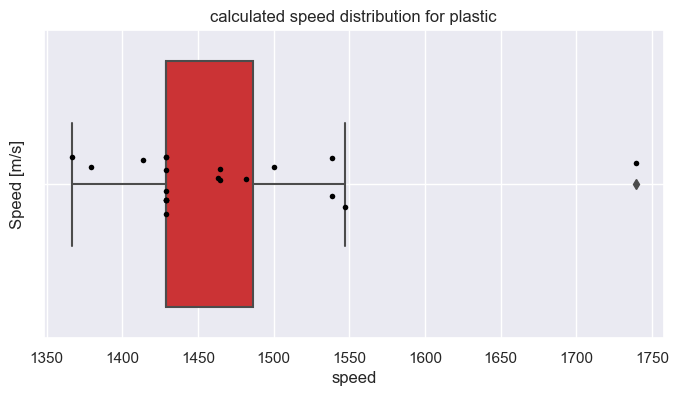

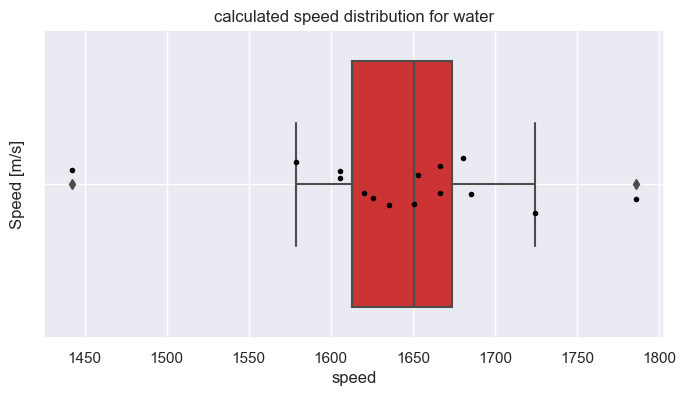

In [157]:
# Get unique material values
materials = df['material'].unique()

# Create three separate plots for each material
for material in materials:
    material_df = df[df['material'] == material]
    
    plt.figure(figsize=(8, 4))  # Adjust the figure size as needed
    
    # Create a boxplot for the material
    sns.boxplot(data=material_df, x='speed', palette='Set1')
    
    # Add individual measurements as crosses (or points)
    sns.stripplot(data=material_df, x='speed', jitter=True, color='black', size=4)
    
    # Set labels and title
    plt.ylabel('Speed [m/s]')
    plt.title(f'calculated speed distribution for {material}')
    
    # Rotate x-axis labels for better readability

    
    # Show the plot
    plt.grid(True)
    plt.show()


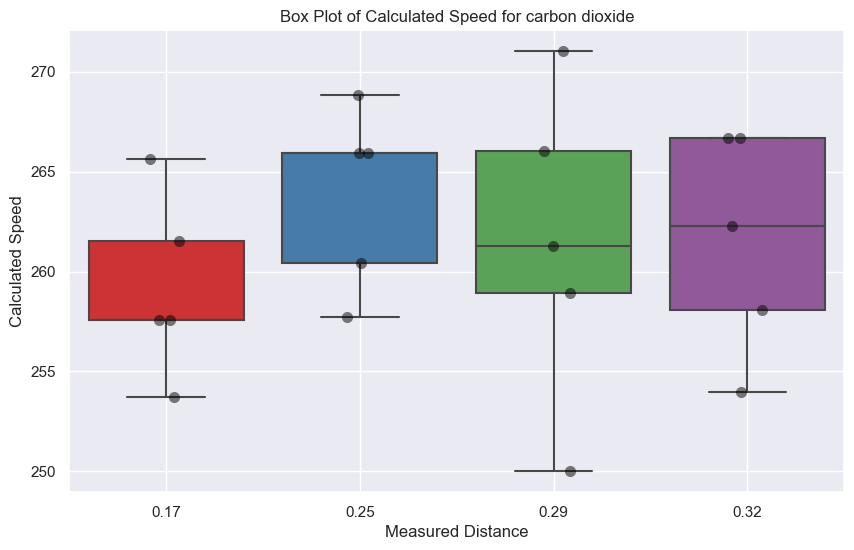

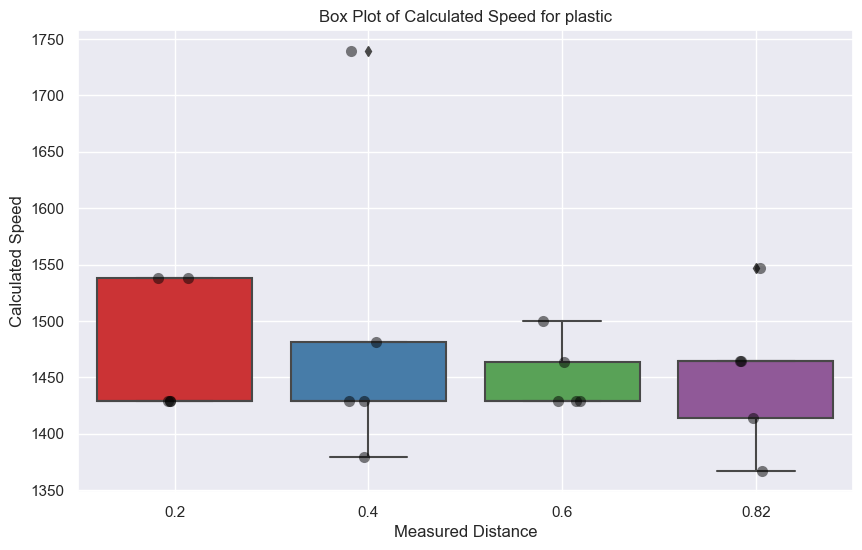

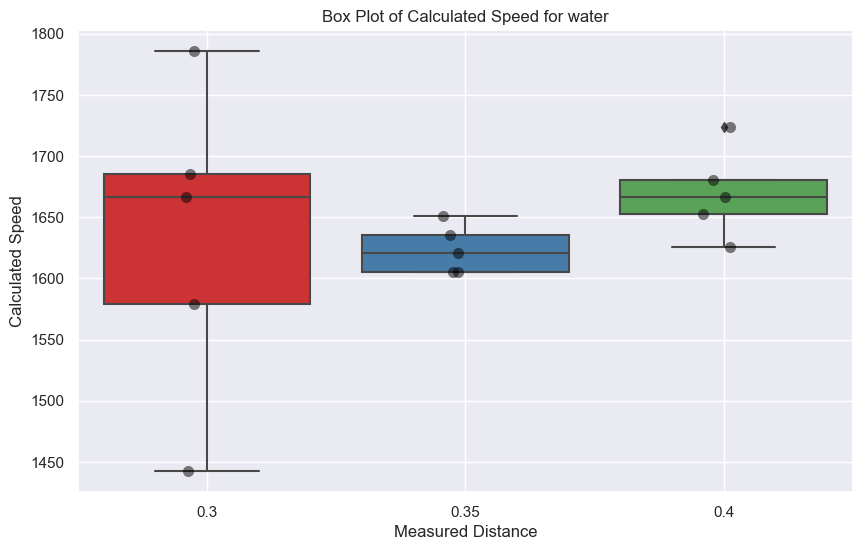

In [158]:
for material in materials:
    material_data = df[df['material'] == material]

    plt.figure(figsize=(10, 6))
    
    # Create a box plot
    sns.boxplot(data=material_data, x='distance', y='speed', palette="Set1")
    plt.xlabel('Measured Distance')
    plt.ylabel('Calculated Speed')
    plt.title(f'Box Plot of Calculated Speed for {material}')

    sns.stripplot(x='distance', y='speed', data=material_data, color="black", size=8, alpha=0.5) 

    plt.grid(True)
    plt.show()

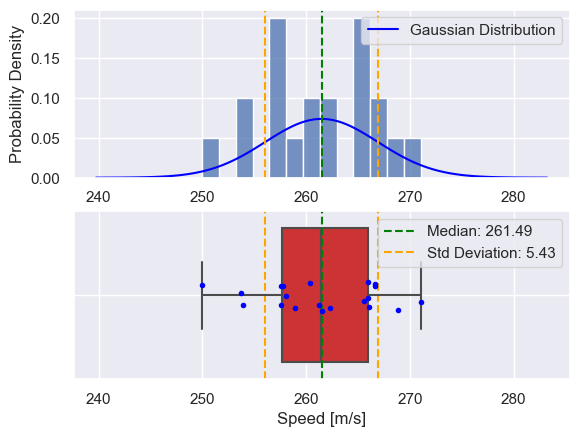

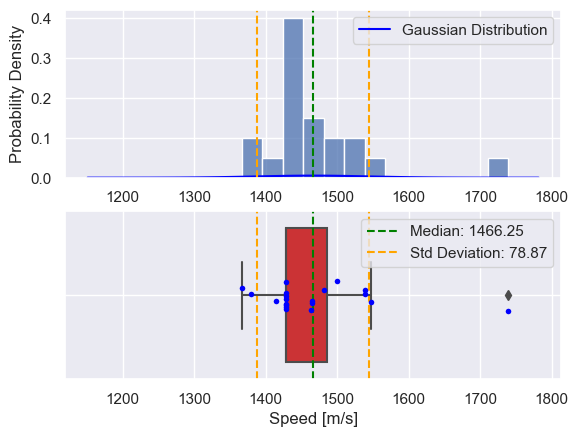

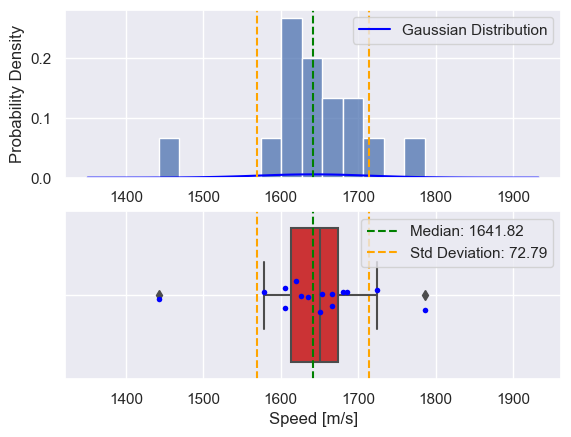

In [229]:
# Create three separate plots for each material
for material in materials:
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)


    material_df = df[df['material'] == material]

    # Extract speed data in microseconds
    speed_data = material_df['speed'].values

    # Calculate the mean and standard deviation of the speed data
    #mean_speed = np.median(speed_data)
    mean_speed = np.mean(speed_data)
    std_deviation_speed = speed_data.std(ddof=0)

    # Create a range of x values for the curve
    x = np.linspace(mean_speed - 4 * std_deviation_speed, mean_speed + 4 *std_deviation_speed, 100, )

    # Create a Gaussian distribution (normal distribution) using the mean and standard deviation
    gaussian = norm.pdf(x, loc=mean_speed, scale=std_deviation_speed)
    
    sns.lineplot(x=x, y=gaussian, label='Gaussian Distribution', color='blue',ax=ax1)

    ax1.axvline(mean_speed, color='green', linestyle='--')
    ax1.axvline(mean_speed - std_deviation_speed, color='orange', linestyle='--')
    ax1.axvline(mean_speed + std_deviation_speed, color='orange', linestyle='--')

    # Plot vertical lines for mean and standard deviation
    plt.axvline(mean_speed, color='green', linestyle='--', label=f'Median: {mean_speed:.2f}')
    plt.axvline(mean_speed - std_deviation_speed, color='orange', linestyle='--', label=f'Std Deviation: {std_deviation_speed:.2f}')
    plt.axvline(mean_speed + std_deviation_speed, color='orange', linestyle='--')
    sns.histplot(x=speed_data,stat='probability',bins= 13, ax=ax1)

    # Create a boxplot for the material
    sns.boxplot(data=material_df, x='speed', palette='Set1', ax=ax2)
    
    # Add individual measurements as crosses (or points)
    sns.stripplot(data=material_df, x='speed', jitter=True, color='blue', size=4, ax=ax2)   

    plt.xlabel('Speed [m/s]')
    ax1.set_ylabel('Probability Density')

    plt.legend
    plt.grid(True)
    plt.show()

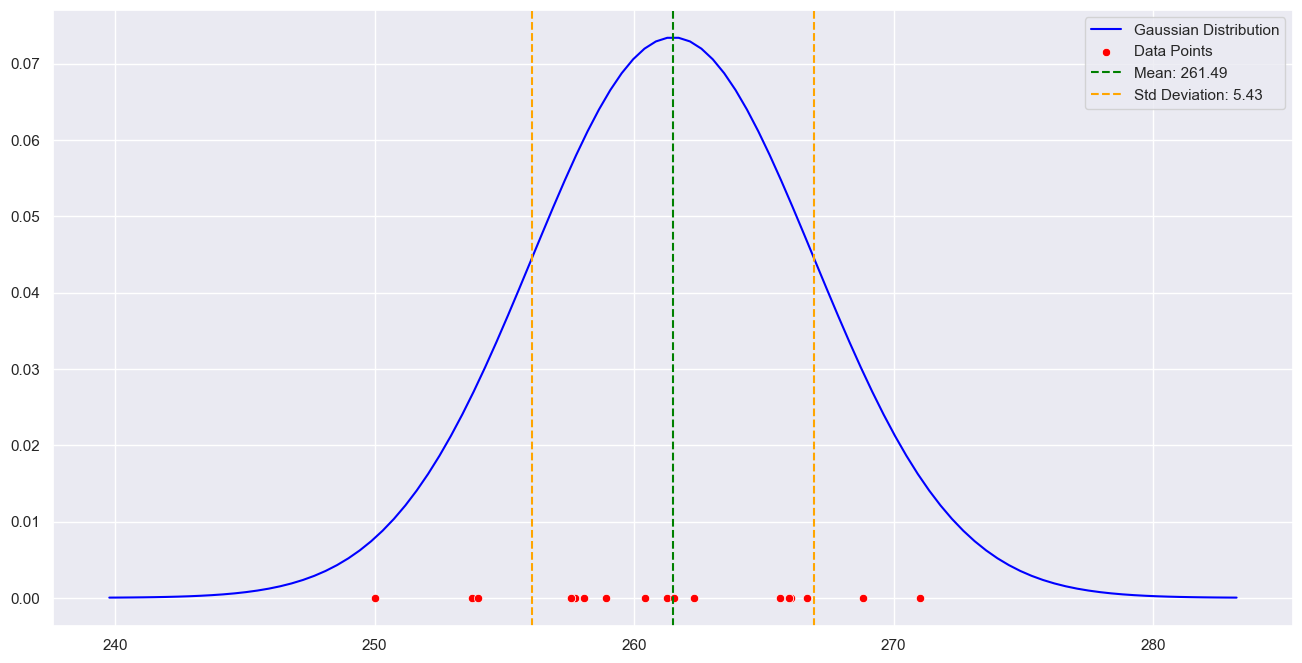

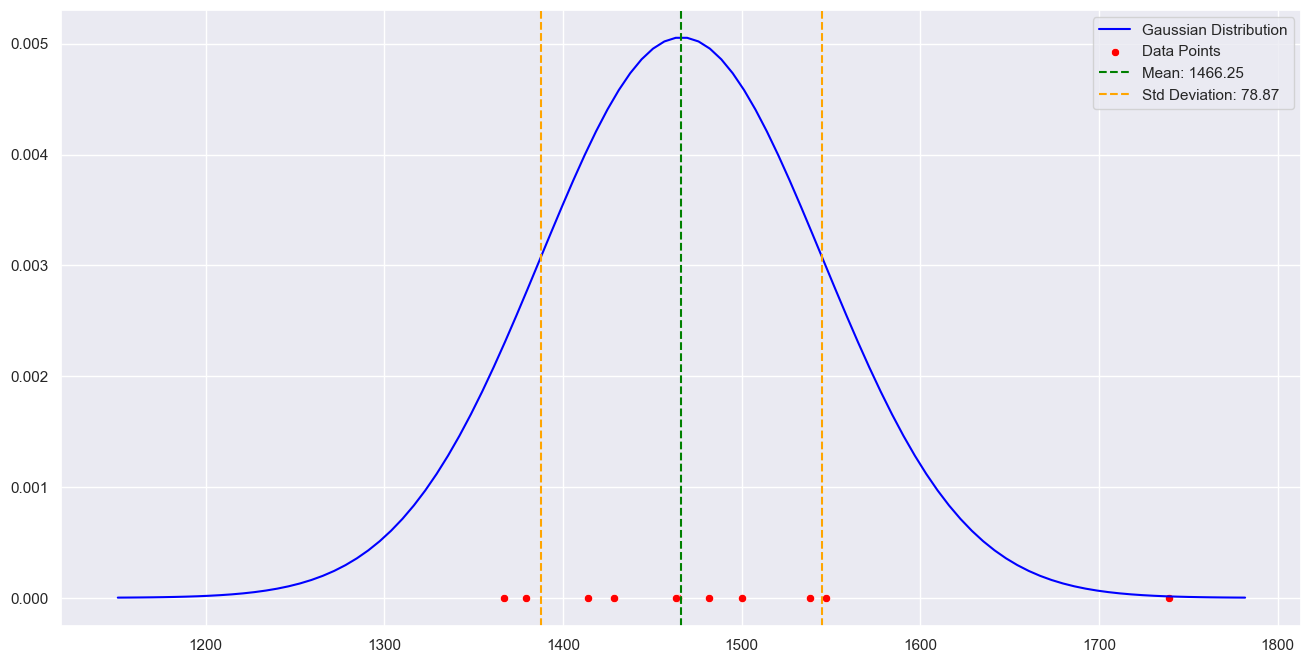

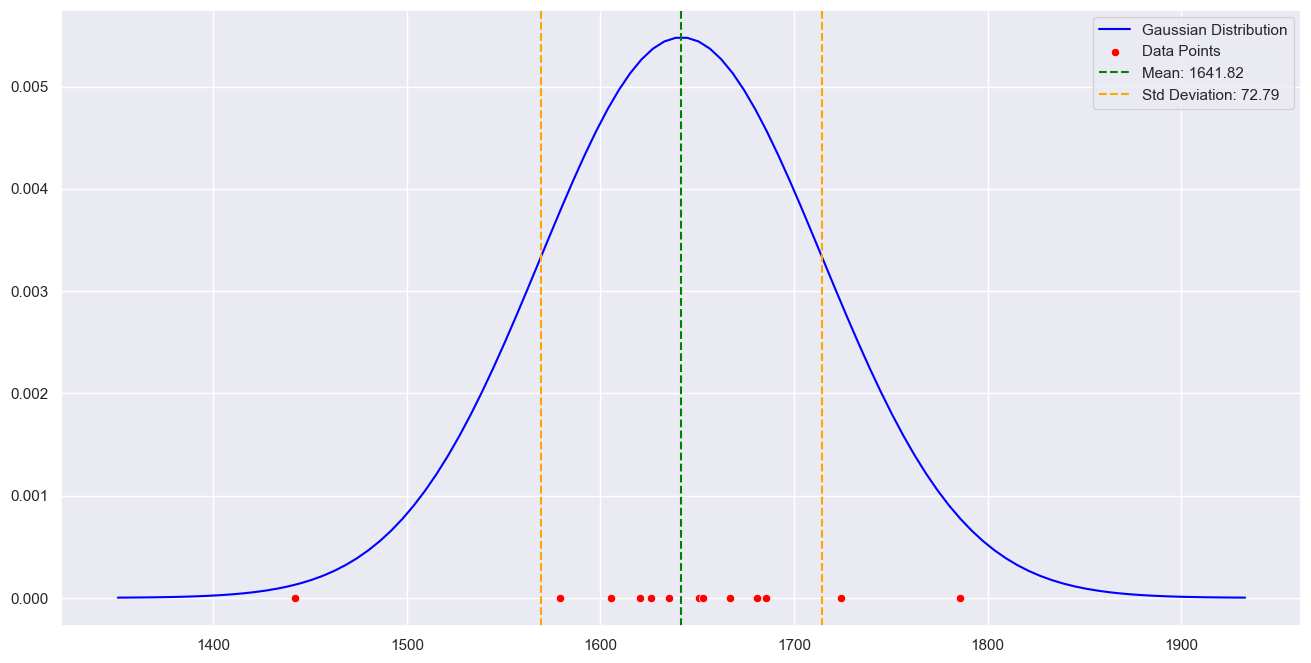

In [224]:
for material in materials:
    material_df = df[df['material'] == material]
    fig = plt.figure(figsize=(16,8))
    # Extract speed data in microseconds
    speed_data = material_df['speed'].values

    # Calculate the mean and standard deviation of the speed data
    mean_speed = np.median(speed_data)
    mean_speed = np.mean(speed_data)
    std_deviation_speed = speed_data.std(ddof=0)

    # Create a range of x values for the curve
    x = np.linspace(mean_speed - 4 * std_deviation_speed, mean_speed + 4 *std_deviation_speed, 100, )

    # Create a Gaussian distribution (normal distribution) using the mean and standard deviation
    gaussian = norm.pdf(x, loc=mean_speed, scale=std_deviation_speed)
    
    sns.lineplot(x=x, y=gaussian, label='Gaussian Distribution', color='blue')

    # Add data points as a scatterplot
    sns.scatterplot(x=speed_data, y=0, label='Data Points', color='red', marker='o')  

    # Plot vertical lines for mean and standard deviation
    plt.axvline(mean_speed, color='green', linestyle='--', label=f'Mean: {mean_speed:.2f}')
    plt.axvline(mean_speed - std_deviation_speed, color='orange', linestyle='--', label=f'Std Deviation: {std_deviation_speed:.2f}')
    plt.axvline(mean_speed + std_deviation_speed, color='orange', linestyle='--')

    plt.legend()
    plt.show()

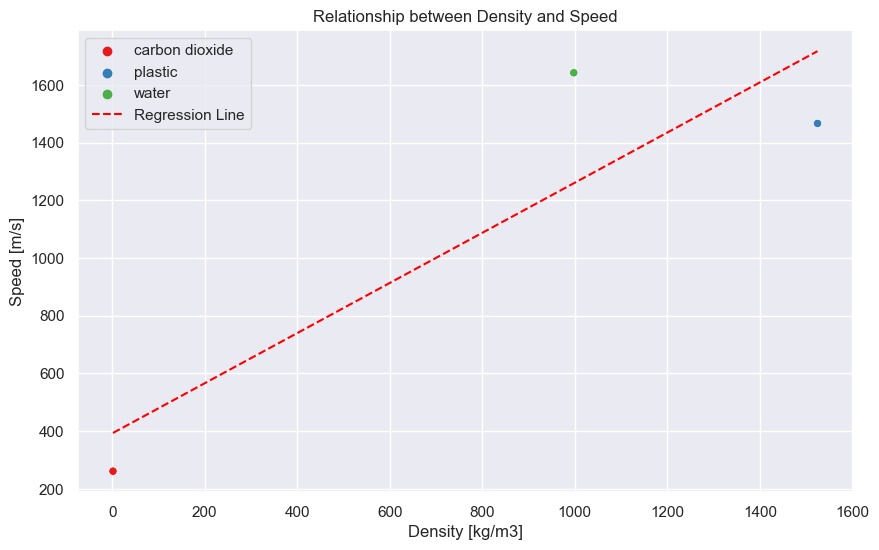

Regression Coefficients: Intercept = 392.4022154056114, Slope = 0.8685123734644576
-132.4637953209322
-250.37519306127388
382.8389883822065


In [253]:
# Create a scatterplot with regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(data=averaged_material_df, x='density', y='speed', hue='material', palette='Set1')

plt.xlabel('Density [kg/m3]')
plt.ylabel('Speed [m/s]')
plt.title('Relationship between Density and Speed')

# Fit a linear regression model to the data points
X = averaged_material_df['density'].values.reshape(-1, 1)
y = averaged_material_df['speed'].values

regressor = LinearRegression()
regressor.fit(X, y)

# Plot the regression line
x_values = np.linspace(df['density'].min(), df['density'].max(), 100)
y_values = regressor.predict(x_values.reshape(-1, 1))
plt.plot(x_values, y_values, linestyle='--', color='red', label='Regression Line')

# Show legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Print regression coefficients
print(f'Regression Coefficients: Intercept = {regressor.intercept_}, Slope = {regressor.coef_[0]}')

i=0
while i < len(X):
    print(y[i] - regressor.predict(X)[i])
    i+=1